<a href="https://colab.research.google.com/github/edsonportosilva/OptiCommPy/blob/main/jupyter/test_modulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test basic digital modulation functionalities

In [1]:
if 'google.colab' in str(get_ipython()):    
    ! git clone -b main https://github.com/edsonportosilva/OptiCommPy
    from os import chdir as cd
    cd('/content/OptiCommPy/')
    ! pip install . 

In [2]:
from optic.modulation import modulateGray, demodulateGray, GrayMapping
from optic.metrics import signal_power, fastBERcalc
from optic.models import awgn
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from numba import njit

import os.path as path

In [3]:
%load_ext autoreload
%autoreload 2

## Define modulation, modulate and demodulate data

BER = 0.00e+00
SNR(est) = 21.02


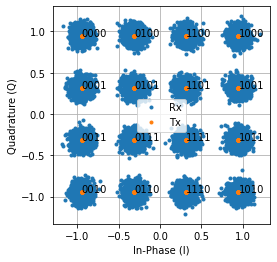

In [4]:
# Run AWGN simulation 
EbN0dB = 15 # SNR per bit
M      = 16 # order of the modulation format
constType = 'qam' # 'qam' or 'psk'

# modulation parameters
constSymb = GrayMapping(M, constType)             # Gray constellation mapping
bitMap = demodulateGray(constSymb, M, constType)  # bit mapping
bitMap = bitMap.reshape(-1, int(np.log2(M)))
Es = signal_power(constSymb)                      # mean symbol energy

# generate random bits
bits = np.random.randint(2, size = 6*2**14)

# Map bits to constellation symbols
symbTx = modulateGray(bits, M, constType)

# Normalize symbols energy to 1
symbTx = symbTx/np.sqrt(signal_power(symbTx))

# AWGN    
snrdB  = EbN0dB + 10*np.log10(np.log2(M))
symbRx = awgn(symbTx, snrdB)

# BER calculation (hard demodulation)
BER, _, SNRest = fastBERcalc(symbRx, symbTx, M, constType)
print('BER = %.2e'%BER)
print('SNR(est) = %.2f'%SNRest)

plt.figure(figsize=(4,4))
plt.plot(symbRx.real, symbRx.imag,'.', label='Rx')
plt.plot(symbTx.real, symbTx.imag,'.', label='Tx')
plt.axis('square')
plt.xlabel('In-Phase (I)')
plt.ylabel('Quadrature (Q)')
plt.legend();
plt.grid()

for ind, symb in enumerate(constSymb/np.sqrt(Es)):
    bitMap[ind,:]
    plt.annotate(str(bitMap[ind,:])[1:-1:2], xy = (symb.real, symb.imag))